<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>
 Summer Olympics Games Project - By Harjeet Kaur

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Pre-Processing](#section303)<br/>
    - 3.4 [Post-Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many times Olympics games hosted till date and which country hosted the maximum Olympics games?](#section401)<br/>
    - 4.2 [How many countries participation in Olympics over the years?](#section402)<br/>
    - 4.3 [how many total medals won till date in Olympics and year wise each medal won by countries?](#section403)<br/>
    - 4.4 [What is the medal won count betwen Men and Women in each Olympic year?](#section404)<br/>
    - 4.5 [Display the Medal Tally (Gold,Silver,Bronze) of each Country in each Olympics year.](#section405)<br/>
    - 4.6 [Which Country won the Max number of Gold,Silver,Bronze Medal in Olympic History ?](#section406)<br/>
    - 4.7 [Which Country won the Olympics games more than __ONCE__ .](#section407)<br/>
    - 4.8 [Which are the __Top Three__ Countries in Olympic History over the period ?](#section408)<br/>
    - 4.9 [How the performance of women in Olympics changed over the period ?](#section409)<br/>
    - 4.10 [Indian Performance in Olympic history ?](#section410)<br/>
    - 4.11 [Which Athlete won the maximum number of medals in Swimming in Olympics History ?.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
### 1. Problem Statement

This notebook provides the data analysis for __Summer Olympics games__ dataset and figure out interesting __statistics__ and _insight_ about Olympics games being held till year 2012. 

* __Olympics Games EDA__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

# <a id=section2></a>
### 2. Data Loading and Description
<img src="Rio-Olympics.jpg" width="540" height="760"/>

- This dataset consists of information about Country,Year,Event,Discipline and Medal won by athlete in different Olympics games.
- It contains around __31165__ rows with medal won information about __148__ distinct countries in __666__ distinct events in  the Olympics Games history.
- •The dataset comprises of 31165 observations of 9 columns. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Year          | Olympic Year                                              | 
| City          | City Where the Olympics games being held on.              |  
| Sport         | Sport in Olympics e.g Aquatics                            | 
| Discipline    | Discipline of game under Sport like Swimming in Aquatics  |                                         |   
| Athlete       | Name of the Athlete                                       |
| Country       | Name of the Country e.g HUN for Hungry                    |
| Gender        | Gender of the Athlete. men or women                       |
| Event         | Event of the Sport e.g 100M race                          |
| Medal         | Medal won by Athlete (Gold,Silver,Bronze)                 |


In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

Olympics_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")


<a id=section3></a>
## 3. Data Profiling

<a id=section301></a>
### 3.1 Understanding the Olympics Data Set

- Let us analyze the Olympics dataset from number of rows and columns prespective

In [2]:
Olympics_df.shape

(31165, 9)

- Summer Olympics dataset has 31165 rows spread in 9 columns. Let us explore the columns further.

In [3]:
Olympics_df.columns[:]   #It shows the different columns names and its dtype as Object

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [4]:
Olympics_df.columns[-2:] #It will show you last two columns of dataset

Index(['Event', 'Medal'], dtype='object')

In [5]:
Olympics_df.info()  # Info gives details about total entries (rows),their datatype,Null or not null info. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


#### Olympic dataset has only ONE numeric column as Year and rest all the columns are Object type or Categorical in nature.

In [6]:
Olympics_df.isnull().sum()   #Check for Null values in dataset

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

#### There are four null values for __Country__ column

In [7]:
Olympics_df.duplicated().sum() #Check for Duplicates values

2

#### The above result shows __2__ duplicates rows values in dataset

In [8]:
Olympics_df.head()  #Getting the top 5 rows of dataset.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
Olympics_df.tail()  #Getting the bottom 5 rows in dataset

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


<a id=section302></a>
### 3.2 Pre-Profiling

#### Generating Pandas Pre-profiling, an interactive HTML Report using Pre-profiling feature to describe the 
#### Olympics dataset and visual representation of some of their columns

In [10]:
profile = pandas_profiling.ProfileReport(Olympics_df)
profile.to_file(outputfile="OlympicsDataset_before_preprocessing.html")

This HTML report gives the summary about the Olympics dataset and describe about the number of rows, columns, their missing values,and also provide insight about each column like distinct values in Country column or total number of Gold,Silver and Bronze medal won in the Olympic history.

<a id=section303></a>
### Pre-processing

- Dealing with duplicates and missing values<br/>
    - Dropping the duplicates rows entries.
    - Replacing missing values of __Country__ with Mode values.
    

In [11]:
Olympics_df.drop_duplicates(inplace=True) #It will drop the duplicates rows from the original dataset because of inplace as True.


In [12]:
Olympics_df.duplicated().sum()  #Check for duplicates rows after deletion

0

The above result shows that the duplicates rows from the Olympic dataset get removed.

In [13]:
Olympics_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [14]:
Country_Mode = Olympics_df["Country"].mode()
Olympics_df["Country"].fillna(Country_Mode,inplace=True)


Replace the __4 missing values of Country with __Mode__ of Olympics["Country"]

<a id=section304></a>
### Post Profiling

After processing the missing and duplicates values and now again generate the profile.


In [15]:
profile = pandas_profiling.ProfileReport(Olympics_df)
profile.to_file(outputfile="OlympicsDataset_After_preprocessing.html")

<a id=section4></a>
## Questions

<a id=section401></a>
### How many times Olympics games hosted till date and which country hosted the maximum Olympics games?

In [16]:
#1.	How many times the Olympics hosted till 2012?
print("Number of times the Olympics has been hosted since 1896 :- ",len(pd.unique(Olympics_df["Year"])))


Number of times the Olympics has been hosted since 1896 :-  27


In [17]:
#2.	Which City hosted the Olympics maximum number of times ?

print(Olympics_df.loc[:, ['Year', 'City']].drop_duplicates()['City'].value_counts().sort_values(ascending=False).head(1))


London    3
Name: City, dtype: int64


In [91]:
# Which countries has hosted the Olympics more than ONCE

host_Country = Olympics_df.loc[:, ['Year', 'City']].drop_duplicates()["City"].value_counts(ascending=False).rename_axis('City').to_frame('Count')
host_Country = host_Country[host_Country["Count"]>1].reset_index()
host_Country

,City,Count
0,London,3
1,Paris,2
2,Los Angeles,2
3,Athens,2


The below bar graph shows the Countries which hosted the Olympics games more than Once in Olympics history.

Text(0.5, 1.0, 'COuntries which are hosted the Olympics games more then Once in History')

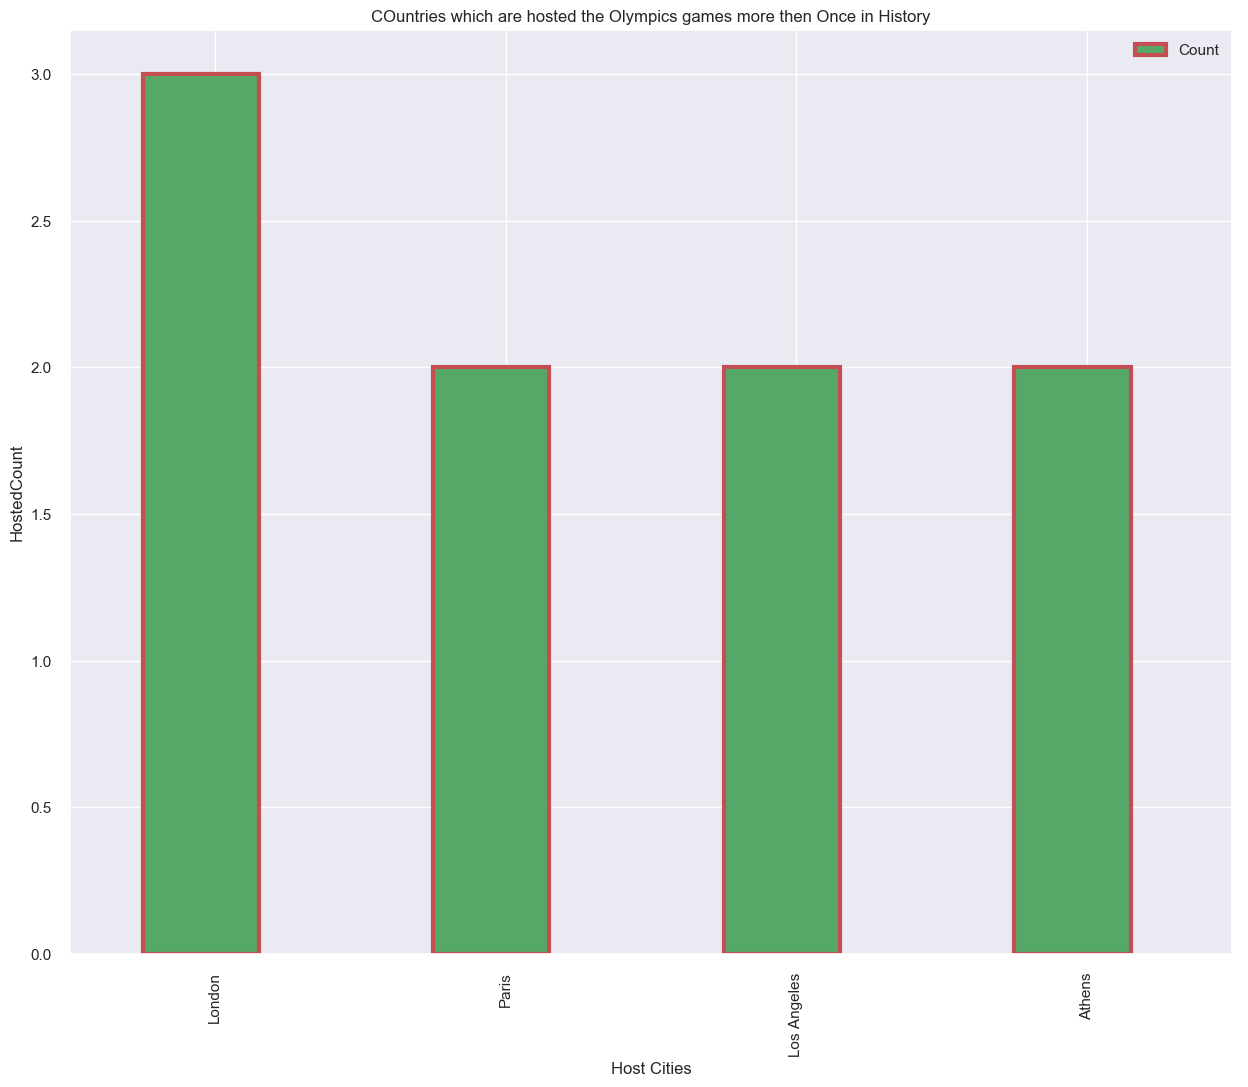

In [119]:
graph1= host_Country.plot.bar(x='City',LineWidth=3,FaceColor='g',EdgeColor='r',Width=0.4)

#Setting axis
plt.xlabel('Host Cities')
plt.ylabel('HostedCount')
plt.title("COuntries which are hosted the Olympics games more then Once in History")

<a id=section402></a>
###  How many countries participation in Olympics over the years?

In [120]:
# 3.	How many countries participated in each Olympics?
Olympics_df.groupby('Year').nunique()[['Country']]

,Country
Year,
1896,11
1900,20
1904,10
1908,19
1912,18
1920,22
1924,27
1928,32
1932,27


The below graph explain the participation of number of countries over the period of Olympics history. In 1896, when it was </br>
started , there were only __10__ countries participated from the world which rises to __86__ by the end of year 2012.It shows the upward positive trends in term of number of countries particiapted in Olympics</br>
The participation level almost above __80 nations__ from year 1996 onwards. Probably people among different nations become more </br>
about Olympics games and it become a world wide festival now.

<function seaborn.categorical.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x00000000059CF2F0>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

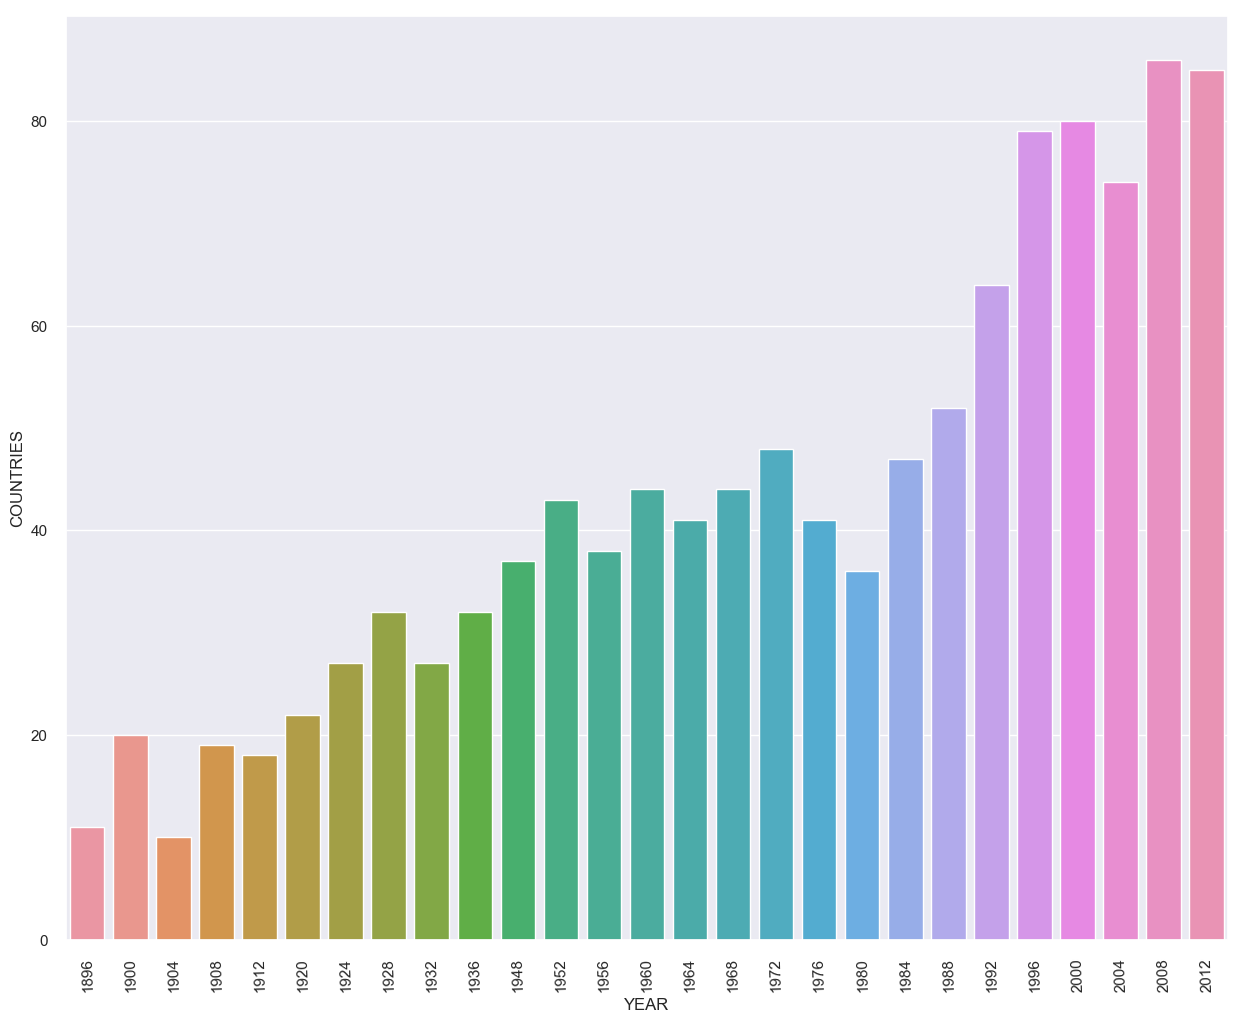

In [90]:
groupYearCountry = Olympics_df.groupby('Year').nunique()[['Country']].reset_index()
sns.set(rc={'figure.figsize':(15,12)})
plot = sns.barplot(x='Year',y='Country',data=groupYearCountry).set_xticklabels(groupYearCountry.Year,rotation=92)
plt.xlabel("YEAR")
plt.ylabel("COUNTRIES")

sns.barplot

In [ ]:
# What are the maximum number of countries participated and minimum number of countries participated in Olypics games.
print("Maximum number of Countries participated in Olympics ",Olympics_df.groupby('Year').nunique()[['Country']].max())

In [ ]:
# What are the maximum number of countries participated and minimum number of countries participated in Olypics games.
print("Minimum number of Countries participated in Olympics ",Olympics_df.groupby('Year').nunique()[['Country']].min())

<a id=section1></a>
### how many total medals won till date in Olympics and year wise each medal won by countries?

In [23]:
#5.	Number of medals won in Olympics till date ? year wise?

numMedals = Olympics_df.groupby('Year').count()[['Medal']].reset_index()
print("Total Medals won year wise \n",numMedals)

TotalMedalWonInOlympics = Olympics_df.count()[['Medal']]
print("Total number of Medal wons in Olympics till date ",TotalMedalWonInOlympics,)

Total Medals won year wise 
     Year  Medal
0   1896    151
1   1900    512
2   1904    470
3   1908    804
4   1912    885
5   1920   1298
6   1924    884
7   1928    710
8   1932    615
9   1936    875
10  1948    814
11  1952    889
12  1956    885
13  1960    882
14  1964   1010
15  1968   1031
16  1972   1185
17  1976   1305
18  1980   1386
19  1984   1459
20  1988   1546
21  1992   1705
22  1996   1859
23  2000   2015
24  2004   1998
25  2008   2042
26  2012   1948
Total number of Medal wons in Olympics till date  Medal    31163
dtype: int64


The below graph shows the Medal tally or the medal count won over the Olympics history.

Text(-0.30555555555555536, 0.5, 'MedalCount')

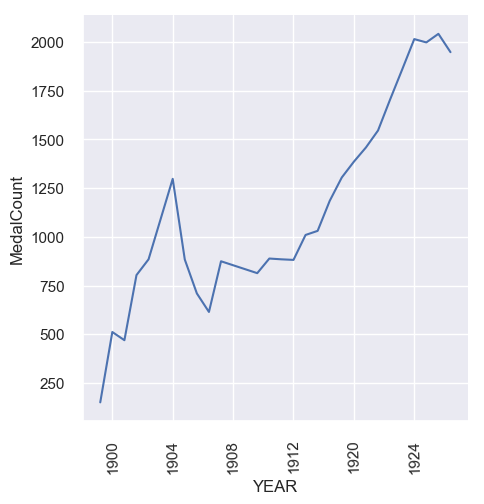

In [24]:

sns.set(rc={'figure.figsize':(15,12)})
plot = sns.relplot(x='Year',y='Medal',data=numMedals,kind='line').set_xticklabels(numMedals.Year,rotation=92)
plt.xlabel("YEAR")
plt.ylabel("MedalCount")



<a id=section403></a>
### how many total medals won till date in Olympics and year wise each medal won by countries?

In [ ]:
#Calculate the number of medals won by different countries in each Olympics?

df_Medal_Country= Olympics_df[['Year','Country','Sport','Medal']].copy()
#df_Medal_Country

#Medal count of each country in each Olypic year

df_Medal_tally = df_Medal_Country.groupby(['Year','Country'],as_index=True).count()[['Medal']]
df_Medal_tally

#Max number of medals won by country in each Olympics year from 1896

temp= df_Medal_tally.groupby(['Year']).max()[['Medal']].reset_index()
temp['Country'] = df_Medal_Country['Country']
temp

#df_Medal_tally.xs(1896,level='Year').max()[['Medal']]

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
plot = sns.barplot(x='Country',y='Medal',data=temp).set_xticklabels(temp.Country,rotation=92)
plt.xlabel("Country")
plt.ylabel("Medal")
plt.



<a id=section404></a>
### What is the medal won count betwen Men and Women in each Olympic year?

In [ ]:
#10.	What is the medal count betwen Men and Women each Olympic year?

Olympics_df.groupby(['Year','Gender']).count()[['Medal']]

#Total number of medal won by Male and Female
Olympics_df.groupby(['Gender']).count()[['Medal']]

#Total Men and women count country wise
temp_df = Olympics_df.groupby(['Year','Country','Gender']).count()[['Medal']]
temp_df.sample(100).reset_index().plot.scatter(x='Year',y='Medal',marker='X',linewidth=12)

<a id=section405></a>
### Display the Medal Tally (Gold,Silver,Bronze) of each Country in each Olympic year.

In [ ]:
#Display the Gold,Silver,Bronze Count of each country in each Olympics year

df_country_medal = Olympics_df[['Year','Country','Medal']].copy()
df_country_medal.reset_index()

df_country_medal.groupby(['Year','Country','Medal'])['Medal'].count()


<a id=section406></a>
### Which Country won the max number of Gold,Silver,Bronze medal in Olympic history ?

In [ ]:
#6.	Country who won maximum Gold medals
#7.	Countries who won max Silver and Bronze ?

def maxGoldWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Gold"].groupby('Country').count()[['Medal']].reset_index()

    print(df.iloc[df["Medal"].idxmax(axis=0)]["Country"])
    return None

def maxSilverWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Silver"].groupby('Country').count()[['Medal']].reset_index()
    #print(df)
    print(df.iloc[df["Medal"].idxmax(axis=0)]["Country"])
    return None

def maxBronzeWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Bronze"].groupby('Country').count()[['Medal']].reset_index()

    print(df.iloc[df["Medal"].idxmax(axis=0)]["Country"])
    return None


print("Maximum Gold Won Country in Olympics History is \t");maxGoldWonCountry() 
print("Maximum Silver Won Country in Olympics History is ");maxSilverWonCountry()
print("Maximum Bronze Won Country in Olympics History is ");maxBronzeWonCountry()

In [ ]:
#Countries who won least number of Gold

def minGoldWonCountry():
    df_Medal_Country.reset_index()
    df= df_Medal_Country[df_Medal_Country.Medal=="Gold"].groupby('Country').count()[['Medal']].reset_index()

    print(df.iloc[df["Medal"].idxmin(axis=0)]["Country"])
    return None

print("Country with minimum number of Gold medals ")
minGoldWonCountry()

<a id=section407></a>
### Which Country won the Olympics games more than __ONCE__ in Olympic history

In [ ]:
#8.	Which countries won the Olympics more than one ?

Olympics_df.groupby(['Year','Country'])['Medal'].count().nlargest(2)

<a id=section408></a>
### Which are the Top three countries in Olympics games over the history of Olympic ?

In [ ]:
#22.	Top three countries over the period

g= Olympics_df.groupby(['Year','Country']).count()
ges = g['Medal'].groupby(level=0,group_keys=False)
ges.nlargest(3)

<a id=section409></a>
### How the performance of women in Olympics history changed over the period ?

In [ ]:
#20.	Performance of women over time
Olympics_df[Olympics_df['Gender']=='Women'].groupby(['Year','Country'])['Medal'].count()

<a id=sectioni410></a>
### Indian Performance in Olympic history ?

In [ ]:
#23.	Performance of India in Olympics vs Gender ?
Olympics_df[Olympics_df['Country']=='IND'].groupby(['Year','Country'])['Medal'].count()

<a id=section411></a>
### Which Athlete won the maximum numberof Gold in Swimming ?

In [ ]:
#9.	Which country won max number of medals in Swimming 
Olympics_df[Olympics_df["Discipline"]=="Swimming"].groupby('Country')['Medal'].count().argmax()

#9.	Which Athelte won max number of medals in Swimming 
Olympics_df[Olympics_df["Discipline"]=="Swimming"].groupby('Athlete')['Medal'].count().argmax()